<div style="background-color: #013a63; color: white; padding: 10px; border-square: 10px; text-align: center; font-size: 24px; font-weight: bold; max-width: 90%; margin: auto;">
    CSCA 5642 - Introduction to Deep Learning - Final Project
</div>

<div style="background-color: magenta; color: white; padding: 10px; border-square: 10px; text-align: center; font-size: 24px; font-weight: bold; max-width: 90%; margin: auto;">
    Stock Market Price Pridiction and Direction Prediction
</div>

#### Project Overview: Stock Market Prediction using Deep Learning

This project aims to predict stock market price movements using deep learning techniques. We will explore both price value prediction and directional movement prediction (up or down).

Here is a breakdown of the steps involved:

**1. Data Collection:**
*   **Source:** We will fetch historical stock data using the Alpaca API.
*   **Features:** The dataset will include Open, High, Low, Close prices, and Volume (OHLCV).
*   **Target:** We will select a specific stock or index to focus on, for example, SPY (S&P 500 ETF) or a major tech stock like AAPL.

**2. Data Preprocessing and Feature Engineering:**
*   **Data Cleaning:** Handle any missing values in the dataset.
*   **Feature Scaling:** Normalize the data, particularly the price and volume, to a range (e.g., 0 to 1) using `MinMaxScaler`. This is crucial for neural network performance.
*   **Technical Indicators:** Engineer new features by calculating technical indicators. These can provide valuable signals for the model. Examples include:
    *   Moving Averages (SMA, EMA)
    *   Relative Strength Index (RSI)
    *   Moving Average Convergence Divergence (MACD)
*   **Sequence Creation:** Transform the time-series data into sequences of a fixed length (e.g., use the last 60 days of data to predict the next day).

**3. Model Selection:**
For time-series forecasting, Recurrent Neural Networks (RNNs) are a strong choice.
*   **LSTM (Long Short-Term Memory):** This is an excellent starting point. LSTMs are designed to remember long-term dependencies, which is perfect for financial time-series data.
*   **GRU (Gated Recurrent Unit):** A variation of LSTM, which is slightly simpler and can be faster to train. It's worth experimenting with as it can sometimes yield better results on certain datasets.
*   **Hybrid Models (e.g., CNN-LSTM):** A Convolutional Neural Network (CNN) can be used to extract features from the input sequences before feeding them into an LSTM. This can sometimes improve performance.

We will start with an LSTM model.

**4. Model Training:**
*   **Data Splitting:** Split the data chronologically into training, validation, and testing sets. A common split is 80% for training, 10% for validation, and 10% for testing.
*   **Model Architecture:** Define the layers of the LSTM network (e.g., number of LSTM layers, number of neurons, dropout layers for regularization).
*   **Compilation:**
    *   **Loss Function:** For price prediction, we'll use a regression loss like `Mean Squared Error (MSE)`. For direction prediction, we'll use `Binary Cross-Entropy`.
    *   **Optimizer:** `Adam` is generally a good choice.
*   **Training:** Train the model on the training data while monitoring its performance on the validation data to prevent overfitting.

**5. Model Evaluation:**
*   **Price Prediction Metrics:** Evaluate the model on the test set using metrics like:
    *   Root Mean Squared Error (RMSE)
    *   Mean Absolute Error (MAE)
*   **Direction Prediction Metrics:**
    *   Accuracy
    *   Precision, Recall, F1-Score
    *   Confusion Matrix
*   **Visualization:** Plot the predicted prices against the actual prices to visually inspect the model's performance.

**6. Conclusion and Future Work:**
*   Summarize the results and the performance of the model.
*   Discuss potential improvements, such as:
    *   Hyperparameter tuning.
    *   Trying different model architectures.
    *   Incorporating sentiment analysis from financial news.
    *   Applying the model to other stocks or markets.


<div style="background-color: purple; color: white; padding: 10px; border-square: 10px; text-align: center; font-size: 24px; font-weight: bold; max-width: 90%; margin: auto;">
    Dataset Description - Alpaca Datafeed
</div>

Alpaca is a modern platform for algorithmic trading that provides a powerful API for accessing real-time and historical market data. The Alpaca Data API is a key component for developers and traders who need reliable and fast access to stock market data.

### Key Features of Alpaca's Datafeed:

*   **Broad Coverage:** Alpaca provides data for a wide range of U.S. equities. You can access data for major stocks like **NVIDIA (NVDA)**, a leading technology company known for its GPUs, as well as Exchange-Traded Funds (ETFs) like **SPY**, which tracks the S&P 500 index.
*   **Real-Time and Historical Data:** You can get up-to-the-minute data for active trading or fetch historical data going back several years for backtesting and analysis.
*   **Data Format (OHLCV):** The data is typically provided in the standard OHLCV format:
    *   **Open:** The price at the beginning of the time interval.
    *   **High:** The highest price during the interval.
    *   **Low:** The lowest price during the interval.
    *   **Close:** The price at the end of the time interval.
    *   **Volume:** The number of shares traded during the interval.
*   **Flexible Timeframes:** The API allows you to specify the timeframe for the data bars, such as:
    *   `1Min` for minute-level data.
    *   `1Day` for daily data.
    *   `1Week` for weekly data.
*   **Easy Integration:** The data can be easily integrated into Python applications using the `alpaca-trade-api` library, which returns data in a pandas DataFrame, making it convenient for data analysis and machine learning.

### Example: SPY vs. NVDA

*   **SPY (SPDR S&P 500 ETF Trust):** This is one of the largest and most popular ETFs. It is designed to track the performance of the S&P 500, which is a stock market index that represents the performance of 500 of the largest companies listed on stock exchanges in the United States.
*   **NVDA (NVIDIA Corporation):** This is a major technology company, a leader in the design of graphics processing units (GPUs). As a single stock, its price is more volatile and influenced by company-specific news and performance, in addition to broader market trends.

Using Alpaca, we can fetch and compare the historical performance of a broad market index (SPY) and a specific, high-growth stock (NVDA) to analyze different market behaviors.

<div style="background-color: purple; color: white; padding: 10px; border-square: 10px; text-align: center; font-size: 24px; font-weight: bold; max-width: 90%; margin: auto;">
    Install Dependencies
</div>

In [8]:
!pip install alpaca-trade-api python-dotenv pandas numpy matplotlib scikit-learn tensorflow pandas_ta

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
INFO: pip is looking at multiple versions of pandas-ta to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of contourpy to determine which version is compatible with other requirements. This could take a while.
   ---------------------------------------- 0.0/331.9 MB ? eta -:--:--
   ---------------------------------------- 0.5/331.9 MB 2.8 MB/s eta 0:01:59
   ---------------------------------------- 1.3/331.9 MB 3.5 MB/s eta 0:01:34
   ---------------------------------------- 2.6/331.9 MB 4.6 MB/s eta 0:01:13
    --------------------------------------- 4.5/331.9 MB 5.6 MB/s eta 0:00:59
    --------------------------------------- 6.0/331.9 MB 6.1 MB/s eta 0:00:53
    --------------------------------------- 8.1/331.9 MB 7.0 MB/s eta 0:00:47
   - -------------------------------------- 11.0/331.9 MB 7.9 MB/s eta 0:00:41
   - ------------

  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda 25.1.1 requires conda-libmamba-solver>=24.11.0, but you have conda-libmamba-solver 24.9.0 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.6 which is incompatible.
tf-keras 2.19.0 requires tensorflow<2.20,>=2.19, but you have tensorflow 2.20.0 which is incompatible.


<div style="background-color: purple; color: white; padding: 10px; border-square: 10px; text-align: center; font-size: 24px; font-weight: bold; max-width: 90%; margin: auto;">
    Libraries
</div>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import time
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler

import alpaca_trade_api as tradeapi
import pandas as pd
import os
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()


import pandas_ta as ta

ModuleNotFoundError: No module named 'posix'

<div style="background-color: purple; color: white; padding: 10px; border-square: 10px; text-align: center; font-size: 24px; font-weight: bold; max-width: 90%; margin: auto;">
    Mount Google Drive for Colab - Optional and only if using Colab
</div>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

<div style="background-color: purple; color: white; padding: 10px; border-square: 10px; text-align: center; font-size: 24px; font-weight: bold; max-width: 90%; margin: auto;">
    Loading the Dataset and Inspection
</div>

Successfully fetched 2012 data points for SPY.
First 5 rows of the dataset:
                              close    high     low  trade_count     open  \
timestamp                                                                   
2016-01-04 05:00:00+00:00  201.0192  201.03  198.59       655489  200.490   
2016-01-05 05:00:00+00:00  201.3600  201.90  200.05       418709  201.405   
2016-01-06 05:00:00+00:00  198.8200  200.06  197.60       548386  198.330   
2016-01-07 05:00:00+00:00  194.0500  197.44  193.59       796451  195.330   
2016-01-08 05:00:00+00:00  191.9230  195.85  191.58       754102  195.190   

                              volume        vwap  
timestamp                                         
2016-01-04 05:00:00+00:00  225903783  199.753436  
2016-01-05 05:00:00+00:00  112719152  201.085380  
2016-01-06 05:00:00+00:00  153948196  198.839872  
2016-01-07 05:00:00+00:00  216191953  195.202134  
2016-01-08 05:00:00+00:00  216105404  193.673322  

Dataset Info:
<class 'pand

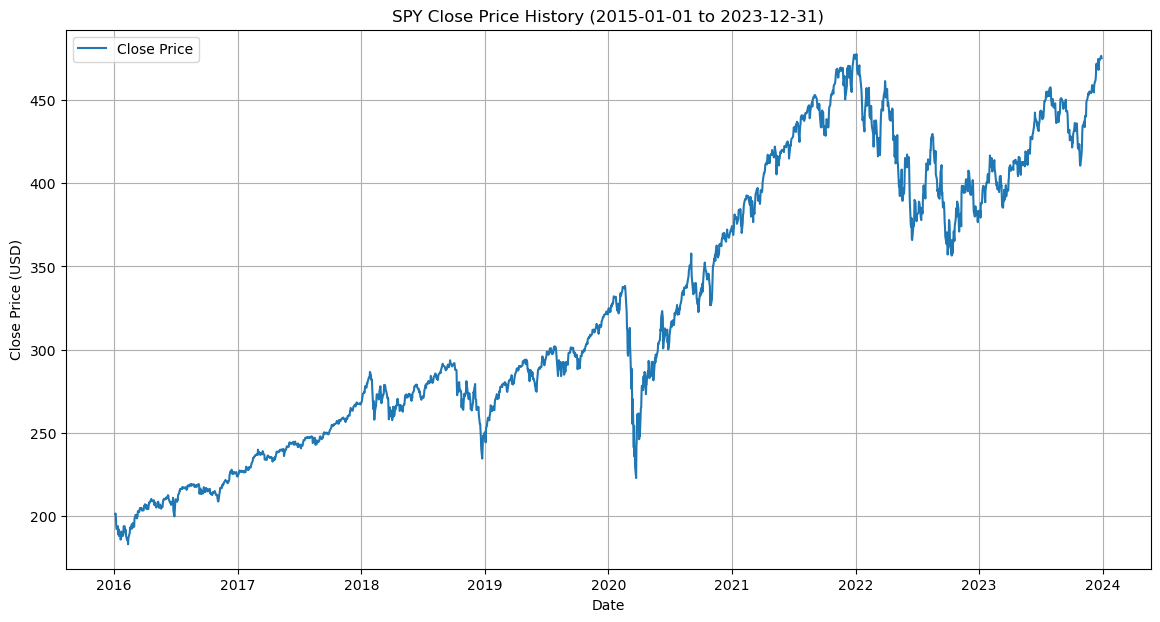

In [ ]:
# --- Alpaca API Credentials ---

API_KEY = os.getenv("ALPACA_API_ID_KEY")
SECRET_KEY = os.getenv("ALPACA_API_SECRET_KEY")
BASE_URL = "https://paper-api.alpaca.markets"  # Use paper trading URL for development

# --- Initialize the Alpaca API ---
api = tradeapi.REST(API_KEY, SECRET_KEY, base_url=BASE_URL, api_version='v2')

# --- Parameters for Data Fetching ---
ticker = 'SPY'  # We will focus on SPY (S&P 500 ETF)
timeframe = '1Day'  # 1-day bars
start_date = '2015-01-01'
end_date = '2023-12-31'

# --- Fetch the Data ---
try:
    
    # Use the get_bars method to fetch historical data
    stock_data = api.get_bars(
        ticker,
        timeframe,
        start=start_date,
        end=end_date
    ).df

    # The .df property returns the data as a pandas DataFrame
    print(f"Successfully fetched {len(stock_data)} data points for {ticker}.")
    print("First 5 rows of the dataset:")
    print(stock_data.head())

except Exception as e:
    print(f"An error occurred while fetching data: {e}")
    print("Please ensure your API keys are correct and have the necessary permissions.")

# --- Save the Data to a CSV file ---
if 'stock_data' in locals() and not stock_data.empty:
    csv_file_path = f'{ticker}_stock_data_{start_date}_to_{end_date}.csv'
    stock_data.to_csv(csv_file_path)
    print(f"\nData saved to {csv_file_path}")

# --- Inspect the Data ---
print("\nDataset Info:")
stock_data.info()

print("\nDataset Description:")
print(stock_data.describe())

# --- Plot the Closing Price ---
plt.figure(figsize=(14, 7))
plt.plot(stock_data['close'], label='Close Price')
plt.title(f'{ticker} Close Price History ({start_date} to {end_date})')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [3]:
display(stock_data.head())

,close,high,low,trade_count,open,volume,vwap
timestamp,,,,,,,
2016-01-04 05:00:00+00:00,201.0192,201.03,198.59,655489,200.490,225903783,199.753436
2016-01-05 05:00:00+00:00,201.3600,201.90,200.05,418709,201.405,112719152,201.085380
2016-01-06 05:00:00+00:00,198.8200,200.06,197.60,548386,198.330,153948196,198.839872
2016-01-07 05:00:00+00:00,194.0500,197.44,193.59,796451,195.330,216191953,195.202134
2016-01-08 05:00:00+00:00,191.9230,195.85,191.58,754102,195.190,216105404,193.673322


In [4]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2012 entries, 2016-01-04 05:00:00+00:00 to 2023-12-29 05:00:00+00:00
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   close        2012 non-null   float64
 1   high         2012 non-null   float64
 2   low          2012 non-null   float64
 3   trade_count  2012 non-null   int64  
 4   open         2012 non-null   float64
 5   volume       2012 non-null   int64  
 6   vwap         2012 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 125.8 KB


In [5]:
print(stock_data.describe())

             close         high          low   trade_count         open  \
count  2012.000000  2012.000000  2012.000000  2.012000e+03  2012.000000   
mean    325.332606   327.118806   323.275269  4.666340e+05   325.267205   
std      82.960576    83.491571    82.365315  3.358083e+05    82.946848   
min     182.860000   184.100000   181.020000  8.430700e+04   182.340000   
25%     258.257700   259.317500   256.580000  2.583472e+05   257.760000   
50%     300.260000   301.133900   298.557500  3.894345e+05   300.200000   
75%     407.132500   408.895000   404.600000  5.696058e+05   406.732500   
max     477.710000   479.980000   476.260000  3.709929e+06   479.220000   

             volume         vwap  
count  2.012000e+03  2012.000000  
mean   8.848056e+07   325.263348  
std    4.313547e+07    82.940096  
min    2.055010e+07   182.644101  
25%    6.127641e+07   258.120082  
50%    7.810695e+07   300.166468  
75%    1.015904e+08   407.009047  
max    3.948250e+08   477.918823  


In [6]:
# 1. Calculate 50-day Simple Moving Average (SMA)
stock_data['SMA_50'] = stock_data['close'].rolling(window=50).mean()

# 2. Calculate RSI (Relative Strength Index)
# The pandas_ta library is used here for convenience. Default length is 14.
stock_data.ta.rsi(close=stock_data['close'], append=True)

# 3. Calculate MACD (Moving Average Convergence Divergence)
# This will append three columns: MACD, MACD Histogram, and MACD Signal line
stock_data.ta.macd(close=stock_data['close'], append=True)

# --- Display the DataFrame with new columns ---
# Displaying the last 10 rows to show calculated values, as initial rows will be NaN
print(stock_data.tail(10))

AttributeError: 'DataFrame' object has no attribute 'ta'

In [ ]:
import pandas as pd
import pandas_ta as ta
import numpy as np

# --- Create a sample DataFrame ---
# Replace this section with your actual data loading
# Your DataFrame should have a 'price' column.
data = {
    'price': np.random.random(100) * 10 + 100 
}
# Ensure you have enough data points for a 50-day moving average
df = pd.DataFrame(data)


# --- Calculate Technical Indicators ---

# 1. Calculate 50-day Simple Moving Average (SMA)
df['SMA_50'] = df['price'].rolling(window=50).mean()

# 2. Calculate RSI (Relative Strength Index)
# The pandas_ta library is used here for convenience. Default length is 14.
df.ta.rsi(close=df['price'], append=True)

# 3. Calculate MACD (Moving Average Convergence Divergence)
# This will append three columns: MACD, MACD Histogram, and MACD Signal line
df.ta.macd(close=df['price'], append=True)


# --- Display the DataFrame with new columns ---
# Displaying the last 10 rows to show calculated values, as initial rows will be NaN
print(df.tail(10))